In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

data = pd.read_csv(r'G:\pesu_io_code\day_8\train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data=np.array(data)
m,n=data.shape
np.random.seed(42)
np.random.shuffle(data)


data_train=data[0:33600]
Y_train=data_train[:, 0]
X_train=data_train[:, 1:].astype(np.float32)
X_train/=255.

data_test=data[33600:m]
Y_test=data_test[:, 0]
X_test=data_test[:, 1:].astype(np.float32)
X_test/=255.
m

# lets divide the data in the 80/20 ratio for training and 20 for testing

42000

In [7]:
#lets now code up the feed forward
def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    e=np.exp(x-np.max(x, axis=1, keepdims=True))
    return e/np.sum(e, axis=1, keepdims=True)


def init_params():
    np.random.seed(42)

    w1=np.random.rand(784, 16)
    b1=np.random.rand(1, 16)
    w2=np.random.rand(16,10)
    b2=np.random.rand(1, 10)
    return w1, b1, w2, b2
    
def forwardpass(X, w1, b1, w2, b2):
    z1=np.dot(X, w1)+ b1
    a1=relu(z1)
    
    z2=np.dot(a1, w2)+ b2
    y=softmax(z2)
    return y

In [8]:
def onehot(Y, num_classes=10):
    m=Y.shape[0]
    one_hot=np.zeros((m, num_classes))
    one_hot[np.arange(m), Y]=1
    return one_hot

def relu_der(x):
    return (x>0)

    
Y_onehot=onehot(Y_train)

In [9]:
#training the NN 
def gradient_descent():
    alpha=0.1
    epochs=2000
    
    w1, b1, w2, b2=init_params()
    
    for epoch in range(epochs):
    
        z1=np.dot(X_train, w1)+ b1
        a1=relu(z1)
        z2=np.dot(a1, w2)+ b2
        y=softmax(z2)

        pred=np.argmax(y, axis=1)
        labels=np.argmax(Y_onehot, axis=1)
        acc=np.mean(pred==labels)
        loss = -(1/m) * np.sum(Y_onehot * np.log(y + 1e-8))
        
        
    
        dz2=y-Y_onehot
        dw2=(1/m)*np.dot( a1.T, dz2)
        db2=(1/m)*np.sum(dz2, axis=0, keepdims=True)
        dz1=relu_der(z1)*np.dot(dz2, w2.T)
        dw1=(1/m)*np.dot(X_train.T, dz1)
        db1=(1/m)*np.sum(dz1, axis=0, keepdims=True)
        
        
        
        w1-= alpha*dw1
        b1-= alpha*db1
        w2-= alpha*dw2
        b2-= alpha*db2

    
        if(epoch%100==0):
            print(f"epoch {epoch}:\n loss: {loss:.4f}\n accuracy: {acc:.4f}")

    return w1, w2, b1, b2

w1, w2, b1, b2=gradient_descent()

epoch 0:
 loss: 13.2807
 accuracy: 0.0968
epoch 100:
 loss: 1.5454
 accuracy: 0.3489
epoch 200:
 loss: 1.1705
 accuracy: 0.5375
epoch 300:
 loss: 0.8602
 accuracy: 0.6669
epoch 400:
 loss: 0.6488
 accuracy: 0.7456
epoch 500:
 loss: 0.5463
 accuracy: 0.7830
epoch 600:
 loss: 0.4852
 accuracy: 0.8091
epoch 700:
 loss: 0.4456
 accuracy: 0.8262
epoch 800:
 loss: 0.4171
 accuracy: 0.8384
epoch 900:
 loss: 0.3949
 accuracy: 0.8476
epoch 1000:
 loss: 0.3770
 accuracy: 0.8553
epoch 1100:
 loss: 0.3621
 accuracy: 0.8621
epoch 1200:
 loss: 0.3496
 accuracy: 0.8674
epoch 1300:
 loss: 0.3390
 accuracy: 0.8715
epoch 1400:
 loss: 0.3297
 accuracy: 0.8752
epoch 1500:
 loss: 0.3215
 accuracy: 0.8782
epoch 1600:
 loss: 0.3141
 accuracy: 0.8814
epoch 1700:
 loss: 0.3075
 accuracy: 0.8835
epoch 1800:
 loss: 0.3015
 accuracy: 0.8858
epoch 1900:
 loss: 0.2960
 accuracy: 0.8880


In [10]:
def predict(X, w1, b1, w2, b2):
    y = forwardpass(X, w1, b1, w2, b2)
    preds = np.argmax(y, axis=1)
    return preds

def test_prediction(index, X, Y, w1, b1, w2, b2):
    x_input = X[index].reshape(1, -1)  # (1, 784)
    y_true = Y[index]
    
    pred = predict(x_input, w1, b1, w2, b2)[0]  # single number
    
    print(f"Prediction: {pred}")
    print(f"Actual Label: {y_true}")
    
    # Reshape back to image
    img = x_input.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {pred} | Actual: {y_true}")
    plt.axis('off')
    plt.show()

Prediction: 9
Actual Label: 9


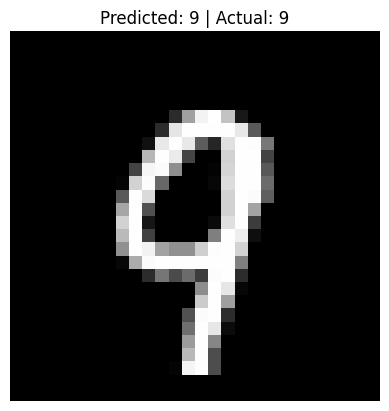

In [11]:
test_prediction(3, X_test,  Y_test, w1, b1, w2, b2)

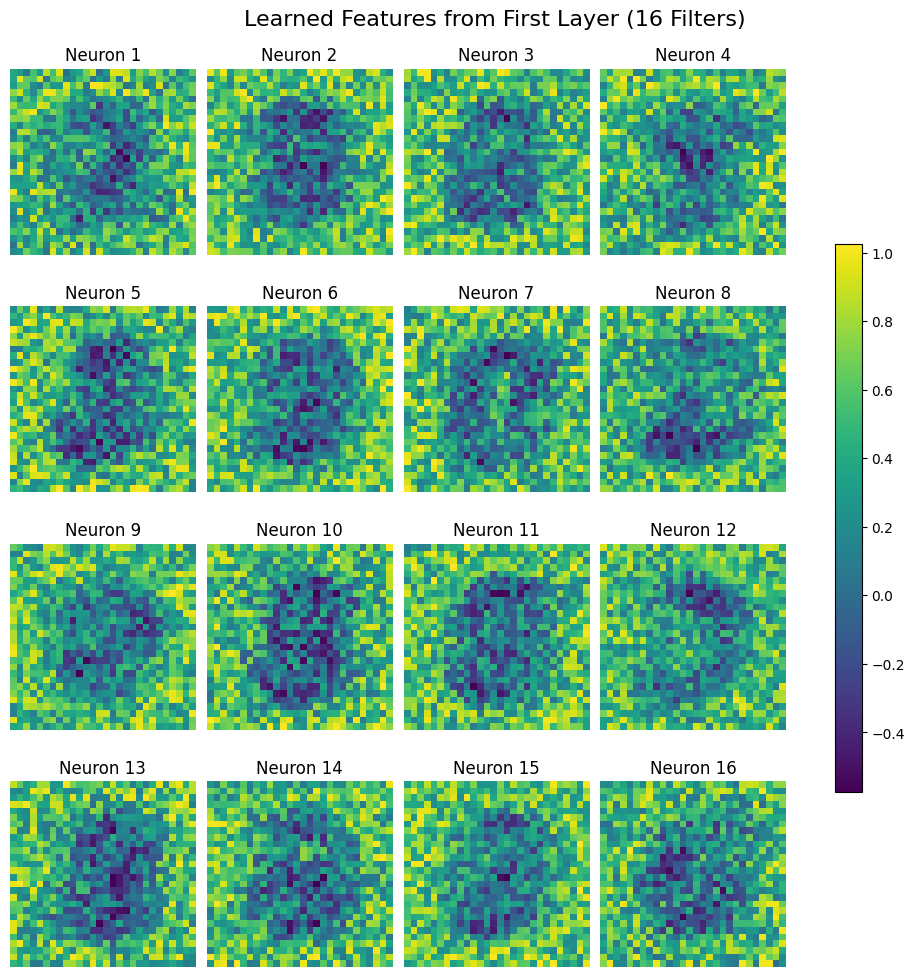

In [ ]:
# Feature Visualization 

def visualize_weights(w1):

    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    fig.suptitle('Learned Features from First Layer (16 Filters)', fontsize=16)
    
    for i, ax in enumerate(axes.flat):
        # Get weights for neuron i and reshape to 28x28
        weights = w1[:, i].reshape(28, 28)
        
        # Plot the weights
        im = ax.imshow(weights, cmap='viridis')
        ax.set_title(f'Neuron {i+1}')
        ax.axis('off')
    
    plt.tight_layout()
    plt.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
    plt.show()

# Call the function after training
visualize_weights(w1)

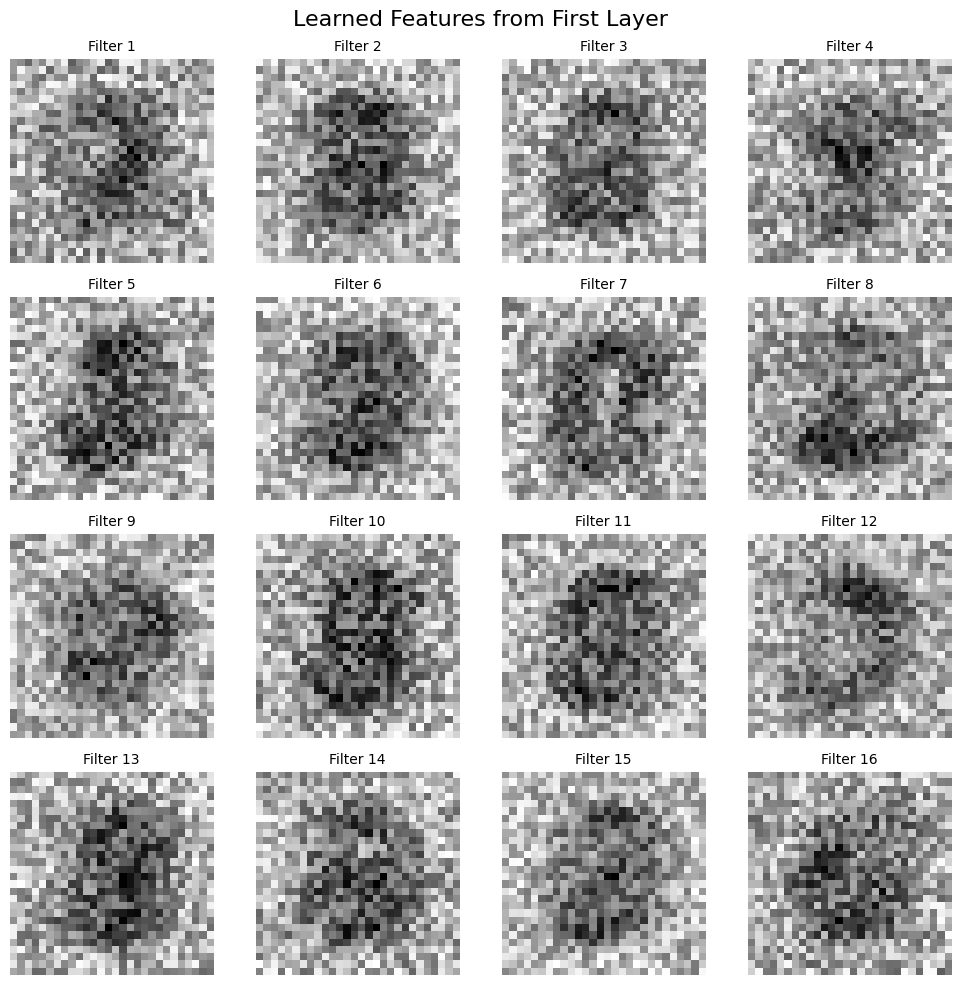

In [40]:
def visualize_weights(w1):
    """Visualize learned weights with normalized contrast"""
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    fig.suptitle('Learned Features from First Layer', fontsize=16)
    
    for i, ax in enumerate(axes.flat):
        weights = w1[:, i].reshape(28, 28)
        
        # Normalize each filter separately for better visibility
        weights_normalized = (weights - weights.min()) / (weights.max() - weights.min())
        
        ax.imshow(weights_normalized, cmap='gray')
        ax.set_title(f'Filter {i+1}', fontsize=10)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

visualize_weights(w1)

In [41]:
def analyze_weight_regions(w1):
    """Analyze which regions have high/low weights"""
    
    # Split image into regions
    for i in range(16):
        weights = w1[:, i].reshape(28, 28)
        
        # Divide into regions
        top = weights[0:9, :].mean()
        middle = weights[9:19, :].mean()
        bottom = weights[19:28, :].mean()
        
        center = weights[9:19, 9:19].mean()
        edges = (weights[0:9, :].mean() + weights[19:28, :].mean() + 
                 weights[:, 0:9].mean() + weights[:, 19:28].mean()) / 4
        
        print(f"Neuron {i}:")
        print(f"  Top: {top:.3f} | Middle: {middle:.3f} | Bottom: {bottom:.3f}")
        print(f"  Center: {center:.3f} | Edges: {edges:.3f}")
        print(f"  Difference (edges-center): {edges-center:.3f}")
        print()

analyze_weight_regions(w1)

Neuron 0:
  Top: 0.418 | Middle: 0.272 | Bottom: 0.378
  Center: 0.055 | Edges: 0.419
  Difference (edges-center): 0.364

Neuron 1:
  Top: 0.340 | Middle: 0.140 | Bottom: 0.325
  Center: -0.138 | Edges: 0.361
  Difference (edges-center): 0.498

Neuron 2:
  Top: 0.339 | Middle: 0.211 | Bottom: 0.348
  Center: -0.014 | Edges: 0.368
  Difference (edges-center): 0.382

Neuron 3:
  Top: 0.401 | Middle: 0.247 | Bottom: 0.349
  Center: -0.021 | Edges: 0.394
  Difference (edges-center): 0.414

Neuron 4:
  Top: 0.355 | Middle: 0.225 | Bottom: 0.323
  Center: -0.054 | Edges: 0.382
  Difference (edges-center): 0.435

Neuron 5:
  Top: 0.340 | Middle: 0.153 | Bottom: 0.285
  Center: -0.126 | Edges: 0.349
  Difference (edges-center): 0.475

Neuron 6:
  Top: 0.369 | Middle: 0.219 | Bottom: 0.357
  Center: 0.043 | Edges: 0.377
  Difference (edges-center): 0.334

Neuron 7:
  Top: 0.377 | Middle: 0.281 | Bottom: 0.333
  Center: 0.138 | Edges: 0.379
  Difference (edges-center): 0.240

Neuron 8:
  Top: 0.

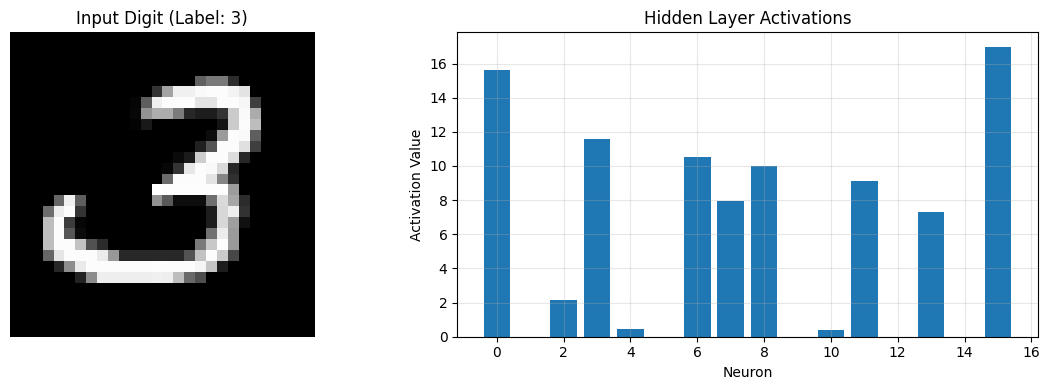

In [42]:
def visualize_activations(X, w1, b1, index=0):
    """Show which neurons activate for a specific input"""
    # Get one image
    x_input = X[index:index+1]
    
    # Forward pass to get activations
    z1 = np.dot(x_input, w1) + b1
    a1 = relu(z1)
    
    # Plot original image
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Original digit
    axes[0].imshow(x_input.reshape(28, 28), cmap='gray')
    axes[0].set_title(f'Input Digit (Label: {Y_test[index]})')
    axes[0].axis('off')
    
    # Activation values
    axes[1].bar(range(16), a1.flatten())
    axes[1].set_xlabel('Neuron')
    axes[1].set_ylabel('Activation Value')
    axes[1].set_title('Hidden Layer Activations')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Test with different images
visualize_activations(X_test, w1, b1, index=999)  # Your example

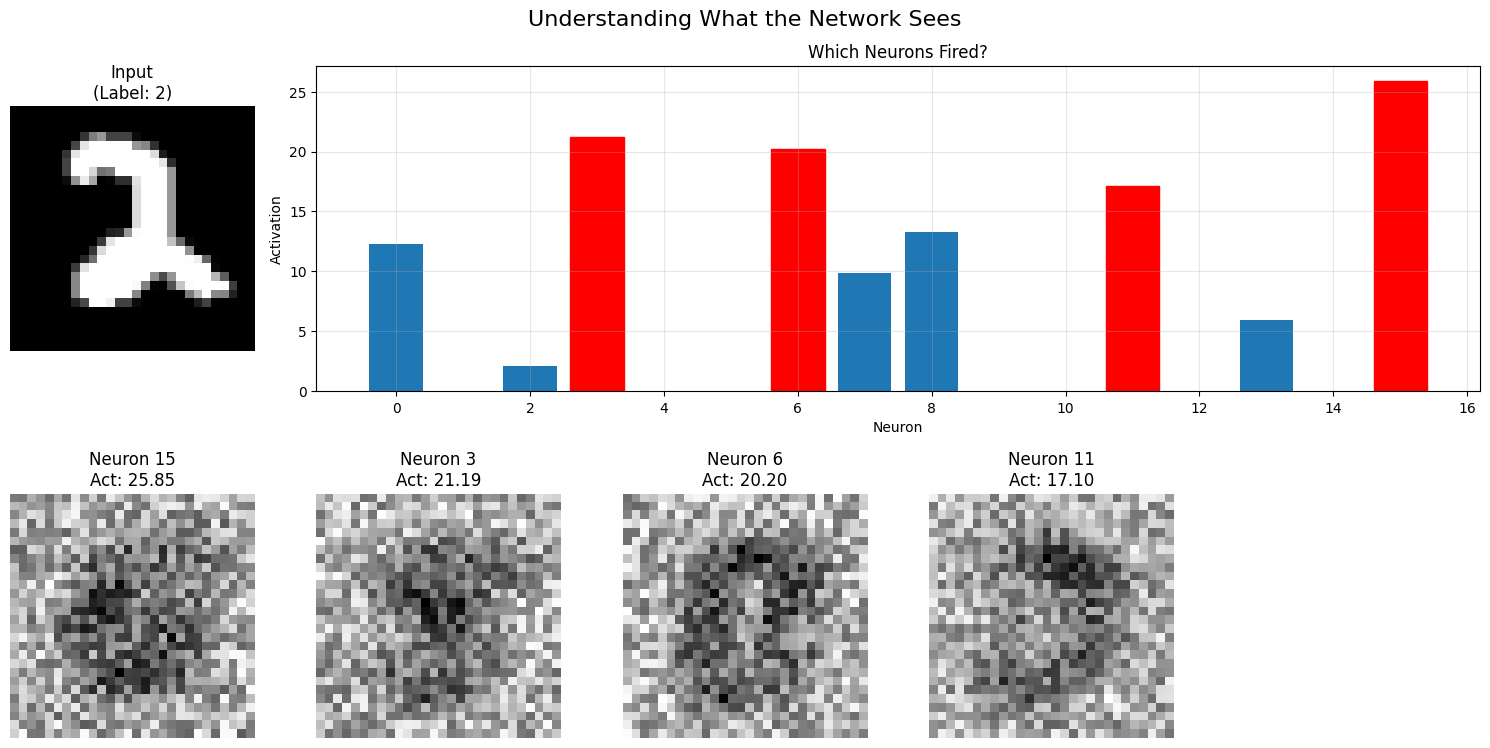

In [43]:
def visualize_both(X, Y, w1, b1, index=0):
    """Show input, activations, and learned features"""
    x_input = X[index:index+1]
    z1 = np.dot(x_input, w1) + b1
    a1 = relu(z1)
    
    fig = plt.figure(figsize=(15, 8))
    
    # Original image
    ax1 = plt.subplot(2, 5, 1)
    ax1.imshow(x_input.reshape(28, 28), cmap='gray')
    ax1.set_title(f'Input\n(Label: {Y[index]})')
    ax1.axis('off')
    
    # Activation bar chart
    ax2 = plt.subplot(2, 5, (2, 5))
    bars = ax2.bar(range(16), a1.flatten())
    ax2.set_xlabel('Neuron')
    ax2.set_ylabel('Activation')
    ax2.set_title('Which Neurons Fired?')
    ax2.grid(True, alpha=0.3)
    
    # Show weights of top 4 activated neurons
    top_neurons = np.argsort(a1.flatten())[-4:][::-1]
    
    for i, neuron_idx in enumerate(top_neurons):
        ax = plt.subplot(2, 5, 6 + i)
        weights = w1[:, neuron_idx].reshape(28, 28)
        ax.imshow(weights, cmap='gray')
        ax.set_title(f'Neuron {neuron_idx}\nAct: {a1[0, neuron_idx]:.2f}')
        ax.axis('off')
        bars[neuron_idx].set_color('red')  # Highlight in bar chart
    
    plt.suptitle('Understanding What the Network Sees', fontsize=16)
    plt.tight_layout()
    plt.show()

# Try it
visualize_both(X_test, Y_test, w1, b1, index=909)